[*********************100%***********************]  1 of 1 completed


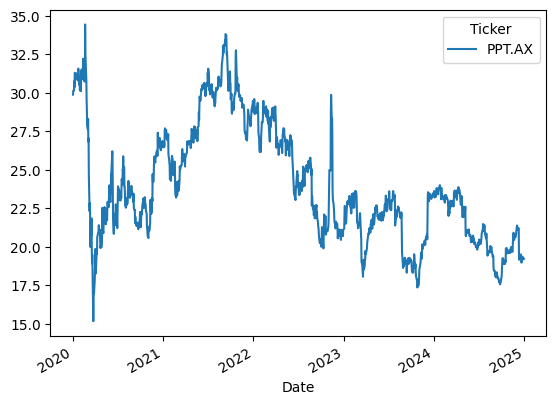

[*********************100%***********************]  1 of 1 completed


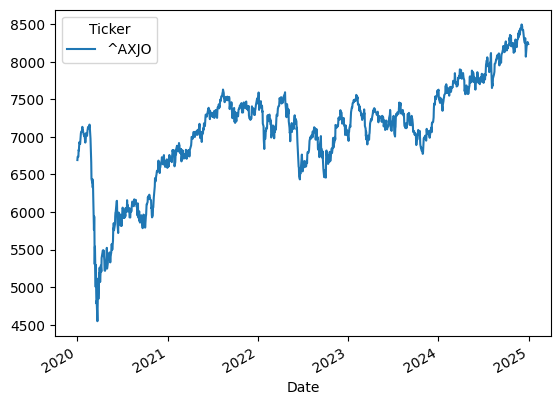

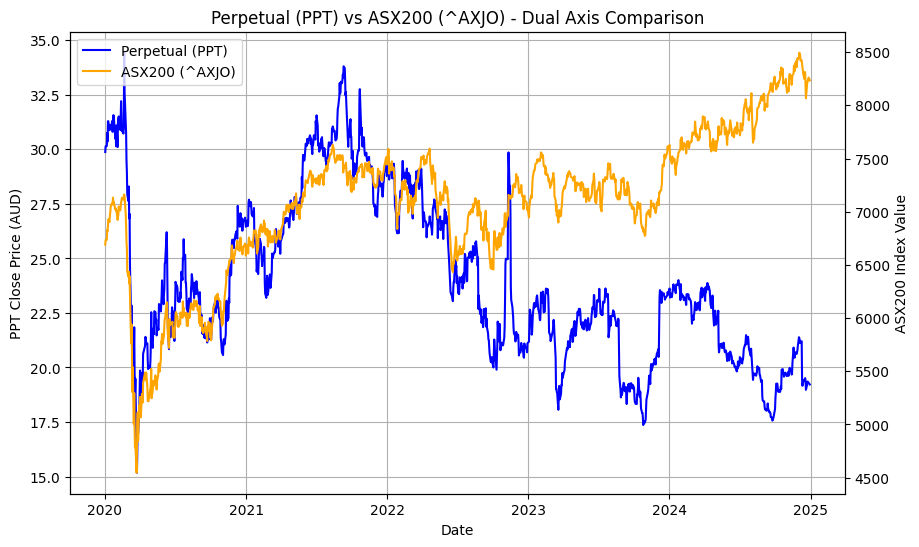

In [11]:
#A chart showing price history for the stock, historical price targets of the 
#   research (taken from a CSV file), and the history of the ASX200 
        # Unsure of where to pull price targets from 
#Price history - PPT  
import matplotlib.pyplot as plt
import yfinance as yf
perpetual = yf.download(
    tickers = 'PPT.AX', 
    start='2020-01-01', 
    end='2024-12-31'
    )
perpetual
perpetual['Close'].plot()
plt.show()
# ASX200 History - how far back should we go?
ASX200 = yf.download(
    tickers = '^AXJO', 
    start='2020-01-01', 
    end='2024-12-31'
    )
ASX200
ASX200['Close'].plot()
plt.show()
# Plot comparing Perpetual to ASX200
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PPT on primary y-axis
line1, = ax1.plot(perpetual['Close'], color='blue', label='Perpetual (PPT)')
ax1.set_xlabel('Date', color='black')
ax1.set_ylabel('PPT Close Price (AUD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')

# Create secondary y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(ASX200['Close'], color='orange', label='ASX200 (^AXJO)')
ax2.set_ylabel('ASX200 Index Value', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title, grid, and legend
plt.title('Perpetual (PPT) vs ASX200 (^AXJO) - Dual Axis Comparison', color='black')
ax1.grid()

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Show plot
plt.savefig("ppt_vs_asx200.png", bbox_inches='tight')
plt.show()
plt.close()
       


C:\Users\Lucy\AppData\Local\Temp\ipykernel_46676\2580214270.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


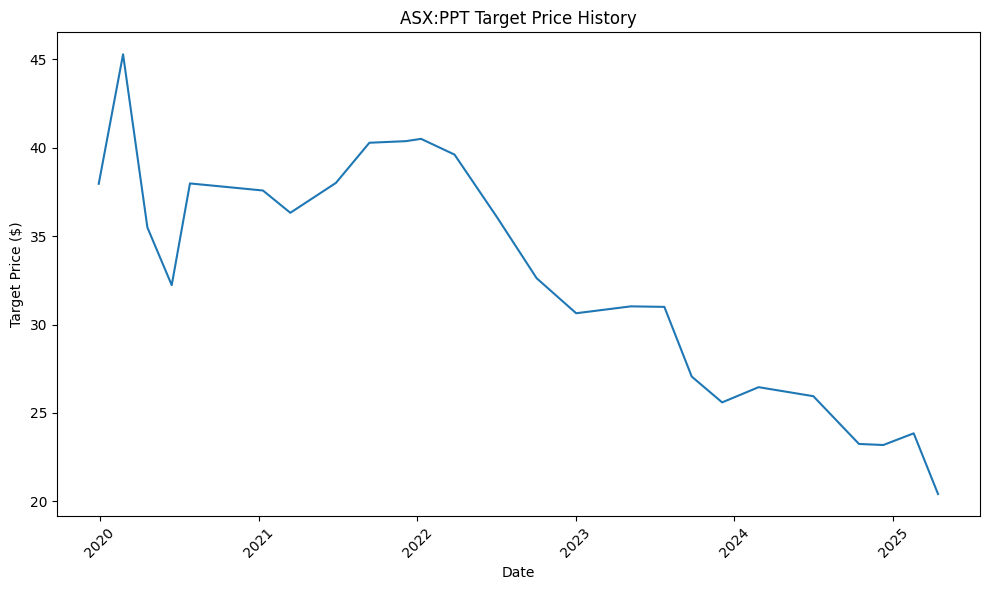

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your CSV file
df = pd.read_csv("C:/Users/Lucy/OneDrive/BAFE YR3/FINM3422/Perpetual Research Report/ppt_target_price.csv")

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Target Price ($)'], linestyle='-')

# Set yearly ticks and format
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-ticks if needed
plt.xticks(rotation=45)

# Add titles and labels
plt.title('ASX:PPT Target Price History')
plt.xlabel('Date')
plt.ylabel('Target Price ($)')
plt.tight_layout()
plt.show()